In [3]:
import cv2

print (cv2.__version__)

4.2.0


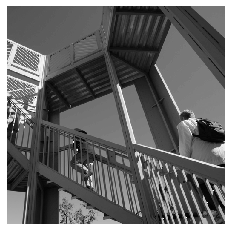

In [42]:
import numpy as np 
from scipy import misc
import matplotlib.pyplot as plt

item = misc.ascent()
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(item)
plt.show()


In [44]:
print (item) #image in matrix form.

[[ 83  83  83 ... 117 117 117]
 [ 82  82  83 ... 117 117 117]
 [ 80  81  83 ... 117 117 117]
 ...
 [178 178 178 ...  57  59  57]
 [178 178 178 ...  56  57  57]
 [178 178 178 ...  57  57  58]]


In [45]:
item_transformed = np.copy(item)

if (item_transformed.all() == item.all()) :
    print ("both matix are equals")

(n,m) = (item.shape[0],item.shape[1])
print (n, m)
print ("number of elements in matrix " ,item.size)
print ("max and min of the matix i are : {0} , {1} " ,np.max(item) , np.min(item))



both matix are equals
512 512
number of elements in matrix  262144
max and min of the matix i are : {0} , {1}  255 0


In [46]:
#filter matix 
filter_horizontal = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
filter_vertical =  [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]

# If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1


In [47]:
#convolution product of matix 512 * 512 marix with filter matix
filter = filter_horizontal
for i in range (1, n - 1) :
    for j in range (1, m -1): 
        elmt = 0.0
        elmt = elmt + (item[i-1,j-1] * filter[0][0]) + (item[i,j-1] * filter[0][1]) + (item[i+1,j-1] * filter[0][2])
        elmt = elmt + (item[i-1,j] * filter[1][0]) + (item[i,j] * filter[1][1]) + (item[i+1,j] * filter[1][2])
        elmt = elmt + (item[i-1,j+1] * filter[2][0]) + (item[i,j+1] * filter[2][1]) + (item[i+1,j+1] * filter[2][2])
        if (elmt < 0 ):
            elmt = 0
        if (elmt > 255) :
            elmt = 255
        item_transformed[i,j] = elmt

print (item_transformed)


[[ 83  83  83 ... 117 117 117]
 [ 82   0   0 ...   0   0 117]
 [ 80   0   0 ...   0   0 117]
 ...
 [178   4   4 ...   0   0  57]
 [178   0   0 ...   0   0  57]
 [178 178 178 ...  57  57  58]]


In [48]:
item_transformed_v = np.copy(item)
filter = filter_vertical
for i in range (1, n - 1) :
    for j in range (1, m -1): 
        elmt = 0.0
        elmt = elmt + (item[i-1,j-1] * filter[0][0]) + (item[i,j-1] * filter[0][1]) + (item[i+1,j-1] * filter[0][2])
        elmt = elmt + (item[i-1,j] * filter[1][0]) + (item[i,j] * filter[1][1]) + (item[i+1,j] * filter[1][2])
        elmt = elmt + (item[i-1,j+1] * filter[2][0]) + (item[i,j+1] * filter[2][1]) + (item[i+1,j+1] * filter[2][2])
        if (elmt < 0 ):
            elmt = 0
        if (elmt > 255) :
            elmt = 255
        item_transformed_v[i,j] = elmt

print (item_transformed_v)

[[ 83  83  83 ... 117 117 117]
 [ 82   5   4 ...   0   0 117]
 [ 80   8   6 ...   0   0 117]
 ...
 [178   0   0 ...  13   8  57]
 [178   0   0 ...  38   3  57]
 [178 178 178 ...  57  57  58]]


In [15]:
#check the dimension of item_tranfered
(n,m) = (item_transformed.shape[0],item_transformed.shape[1])
print (n, m)
print ("number of elements in matrix " ,item_transformed.size)
print ("max and min of the matix i are : {0} , {1} " ,np.max(item_transformed) , np.min(item_transformed))


512 512
number of elements in matrix  262144
max and min of the matix i are : {0} , {1}  255 0


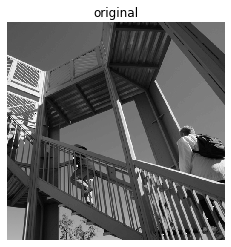

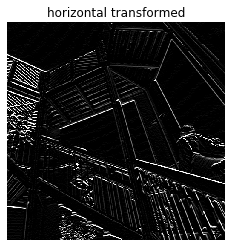

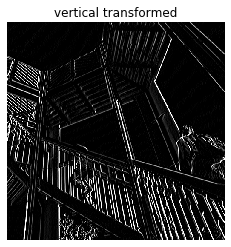

In [53]:
plt.grid(False)
plt.gray()
plt.axis('off')
plt.title ("original")
plt.imshow(item)
plt.figure()
plt.gray()
plt.axis('off')
plt.title("horizontal transformed")
plt.imshow(item_transformed)
plt.figure()
plt.gray()
plt.axis('off')
plt.title("vertical transformed")
plt.imshow(item_transformed_v)
plt.show()

In [57]:
#pooling : max-pooling takes max of the 2,2 matix. 
#The idea here is to iterate over the image, and look at the pixel and it's immediate neighbors to the right, beneath, and right-beneath. Take the largest of them and load it into the new image. 

new_n = int(n/2)
new_m = int(m/2)
newImage = np.zeros((new_n, new_m))
for i in range(0,n,2):
    for j in range(0,m,2):
        pix = []
        pix.append(item_transformed[i,j])
        pix.append(item_transformed[i+1,j])
        pix.append(item_transformed[i,j+1])
        pix.append(item_transformed[i+1,j+1])
        newImage[int(i/2),int(j/2)] = max(pix)

newImage_v = np.zeros((new_n, new_m))
for i in range(0,n,2):
    for j in range(0,m,2):
        pix = []
        pix.append(item_transformed_v[i,j])
        pix.append(item_transformed_v[i+1,j])
        pix.append(item_transformed_v[i,j+1])
        pix.append(item_transformed_v[i+1,j+1])
        newImage_v[int(i/2),int(j/2)] = max(pix)


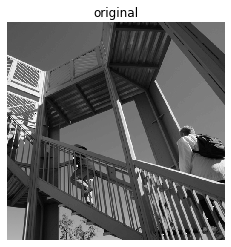

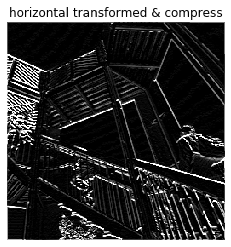

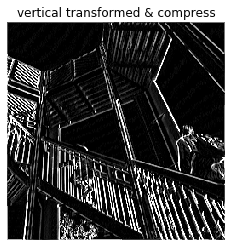

In [73]:
plt.title("original")
plt.gray()
plt.grid(False)
plt.axis('off')
plt.imshow(item)

plt.figure()
plt.title("horizontal transformed & compress")
plt.gray()
plt.grid(False)
plt.axis('off')
plt.imshow(newImage)

plt.figure()
plt.title("vertical transformed & compress")
plt.gray()
plt.grid(False)
plt.axis('off')
plt.imshow(newImage_v)

plt.show() 

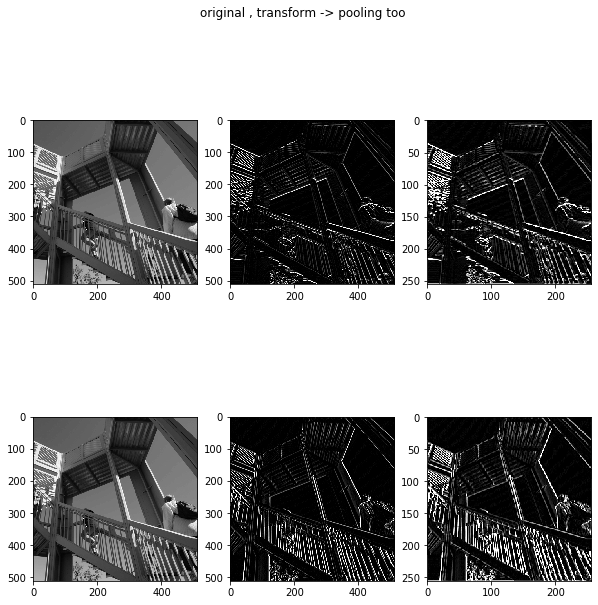

In [111]:
#final comparision
f, axarr = plt.subplots(2,3,figsize=(10, 10))
f.suptitle('original , transform -> pooling too')
#axarr = axarr.flatten()
axarr[0,0].imshow(item)
axarr[0,1].imshow(item_transformed)
axarr[0,2].imshow(newImage)

axarr[1,0].imshow(item)
axarr[1,1].imshow(item_transformed_v)
axarr[1,2].imshow(newImage_v)

plt.show()